#**Flight_Delay_Study**

# Importing Necessary Libraries

In [49]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [50]:
# Loading Dataset

file_path = 'Airline_On-time_Reporting_Dataset.csv'

airline_reporting_data = pd.read_csv(file_path)

In [51]:
airline_reporting_data.tail()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,...,CANCELLATION_CODE,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
115777,8/31/2024 12:00:00 AM,WN,N968WN,4117,TUS,"Tucson, AZ",AZ,HOU,"Houston, TX",TX,...,NaN,0,134.0,118.0,945,NaN,NaN,NaN,NaN,NaN
115778,8/31/2024 12:00:00 AM,WN,N968WN,805,ATL,"Atlanta, GA",GA,DAL,"Dallas, TX",TX,...,NaN,0,125.0,106.0,721,NaN,NaN,NaN,NaN,NaN
115779,8/31/2024 12:00:00 AM,WN,N968WN,805,DAL,"Dallas, TX",TX,LAX,"Los Angeles, CA",CA,...,NaN,0,179.0,160.0,1246,NaN,NaN,NaN,NaN,NaN
115780,8/31/2024 12:00:00 AM,YX,N757YX,3632,AUS,"Austin, TX",TX,EWR,"Newark, NJ",NJ,...,NaN,0,236.0,213.0,1504,NaN,NaN,NaN,NaN,NaN
115781,8/31/2024 12:00:00 AM,YX,N757YX,3647,EWR,"Newark, NJ",NJ,AUS,"Austin, TX",TX,...,NaN,0,216.0,198.0,1504,NaN,NaN,NaN,NaN,NaN


In [52]:
airline_reporting_data.shape

(115782, 31)

In [53]:
airline_reporting_data.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [54]:
airline_reporting_data['ARR_DEL15'].value_counts()

,count
ARR_DEL15,
0.0,89356
1.0,24941


In [55]:
airline_reporting_data['ARR_DELAY'].value_counts()

,count
ARR_DELAY,
-12.0,3536
-11.0,3461
-10.0,3432
-14.0,3369
-13.0,3327
...,...
777.0,1
647.0,1
944.0,1


In [56]:
airline_reporting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115782 entries, 0 to 115781
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              115782 non-null  object 
 1   OP_UNIQUE_CARRIER    115782 non-null  object 
 2   TAIL_NUM             115493 non-null  object 
 3   OP_CARRIER_FL_NUM    115782 non-null  int64  
 4   ORIGIN               115782 non-null  object 
 5   ORIGIN_CITY_NAME     115782 non-null  object 
 6   ORIGIN_STATE_ABR     115782 non-null  object 
 7   DEST                 115782 non-null  object 
 8   DEST_CITY_NAME       115782 non-null  object 
 9   DEST_STATE_ABR       115782 non-null  object 
 10  CRS_DEP_TIME         115782 non-null  int64  
 11  DEP_TIME             114643 non-null  float64
 12  DEP_DELAY            114642 non-null  float64
 13  DEP_DEL15            114642 non-null  float64
 14  TAXI_OUT             114598 non-null  float64
 15  TAXI_IN          

In [57]:
airline_reporting_data.dtypes

,0
FL_DATE,object
OP_UNIQUE_CARRIER,object
TAIL_NUM,object
OP_CARRIER_FL_NUM,int64
ORIGIN,object
ORIGIN_CITY_NAME,object
ORIGIN_STATE_ABR,object
DEST,object
DEST_CITY_NAME,object
DEST_STATE_ABR,object


In [58]:
airline_reporting_data.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,...,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,115782.000000,115782.000000,114643.000000,114642.000000,114642.000000,114598.000000,114578.000000,115782.000000,114578.000000,114297.000000,...,115782.000000,115782.000000,114297.000000,114297.000000,115782.000000,24941.000000,24941.000000,24941.000000,24941.000000,24941.000000
mean,2378.169543,1312.532129,1317.649556,15.145488,0.229357,16.550673,8.814799,1506.267779,1467.021540,9.009213,...,0.010235,0.002591,142.447536,117.097413,873.538408,26.250712,2.644641,9.795798,0.130308,35.405758
std,1459.059037,493.963141,514.095697,62.326189,0.420421,8.191750,6.938100,516.118157,551.791393,63.215262,...,0.100648,0.050837,54.680567,52.094826,444.794085,82.134887,23.647917,25.528055,2.591551,75.986731
min,1.000000,4.000000,1.000000,-29.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-57.000000,...,0.000000,0.000000,30.000000,13.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1225.000000,851.000000,852.000000,-5.000000,0.000000,12.000000,5.000000,1113.000000,1049.000000,-14.000000,...,0.000000,0.000000,102.000000,79.000000,562.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2193.000000,1313.500000,1319.000000,-2.000000,0.000000,15.000000,7.000000,1535.000000,1515.000000,-6.000000,...,0.000000,0.000000,142.000000,117.000000,862.000000,4.000000,0.000000,0.000000,0.000000,12.000000
75%,3503.000000,1730.000000,1745.000000,12.000000,0.000000,19.000000,11.000000,1935.000000,1926.000000,10.000000,...,0.000000,0.000000,177.000000,151.000000,1184.000000,22.000000,0.000000,11.000000,0.000000,42.000000
max,6995.000000,2359.000000,2400.000000,2235.000000,1.000000,168.000000,165.000000,2359.000000,2400.000000,2220.000000,...,1.000000,1.000000,526.000000,480.000000,3904.000000,1794.000000,1141.000000,1083.000000,142.000000,2184.000000


In [59]:
airline_reporting_data.describe(include='object')

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CANCELLATION_CODE
count,115782,115782,115493,115782,115782,115782,115782,115782,115782,1185
unique,31,14,4174,194,189,49,194,189,49,3
top,08-02-2024 00:00,AA,N208AN,DFW,"Dallas/Fort Worth, TX",TX,DFW,"Dallas/Fort Worth, TX",TX,B
freq,4144,31843,170,27900,27900,65394,27901,27901,65383,648


In [60]:
airline_reporting_data.isnull().sum()

,0
FL_DATE,0
OP_UNIQUE_CARRIER,0
TAIL_NUM,289
OP_CARRIER_FL_NUM,0
ORIGIN,0
ORIGIN_CITY_NAME,0
ORIGIN_STATE_ABR,0
DEST,0
DEST_CITY_NAME,0
DEST_STATE_ABR,0


In [61]:
# Calculating the percentage of missing values for each column

missing_percentage = (airline_reporting_data.isnull().sum() / len(airline_reporting_data)) * 100

# Displaying the columns with missing values and their percentages

missing_percentage = missing_percentage[missing_percentage > 0]

print(missing_percentage)

TAIL_NUM                0.249607
DEP_TIME                0.983745
DEP_DELAY               0.984609
DEP_DEL15               0.984609
TAXI_OUT                1.022611
TAXI_IN                 1.039885
ARR_TIME                1.039885
ARR_DELAY               1.282583
ARR_DEL15               1.282583
CANCELLATION_CODE      98.976525
ACTUAL_ELAPSED_TIME     1.282583
AIR_TIME                1.282583
CARRIER_DELAY          78.458655
WEATHER_DELAY          78.458655
NAS_DELAY              78.458655
SECURITY_DELAY         78.458655
LATE_AIRCRAFT_DELAY    78.458655
dtype: float64


In [62]:
# Calculating the percentage of missing values for each column
missing_percentage = (airline_reporting_data.isnull().sum() / len(airline_reporting_data)) * 100

# Dropping columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
airline_reporting_data_cleaned = airline_reporting_data.drop(columns=columns_to_drop)

# Printing the dropped columns for reference
print(f"Dropped columns: {list(columns_to_drop)}")

Dropped columns: ['CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


In [63]:
# Removing records with missing values in 'ARR_DEL15' as target variable cannot have missing values

airline_reporting_data_cleaned = airline_reporting_data_cleaned.dropna(subset=['ARR_DEL15'])

In [64]:
airline_reporting_data_cleaned.isna().sum()

,0
FL_DATE,0
OP_UNIQUE_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN,0
ORIGIN_CITY_NAME,0
ORIGIN_STATE_ABR,0
DEST,0
DEST_CITY_NAME,0
DEST_STATE_ABR,0


In [65]:
# Converting ARR_DEL15 to categorical labels

airline_reporting_data_cleaned['ARR_DEL15'] = airline_reporting_data_cleaned['ARR_DEL15'].map({0.0: '0', 1.0: '1'})

# Verifying the changes
print(airline_reporting_data_cleaned['ARR_DEL15'].dtype)
print(airline_reporting_data_cleaned['ARR_DEL15'].value_counts())


object
ARR_DEL15
0    89356
1    24941
Name: count, dtype: int64


<ipython-input-65-9b583620731b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_reporting_data_cleaned['ARR_DEL15'] = airline_reporting_data_cleaned['ARR_DEL15'].map({0.0: '0', 1.0: '1'})


# Detecting Outliers

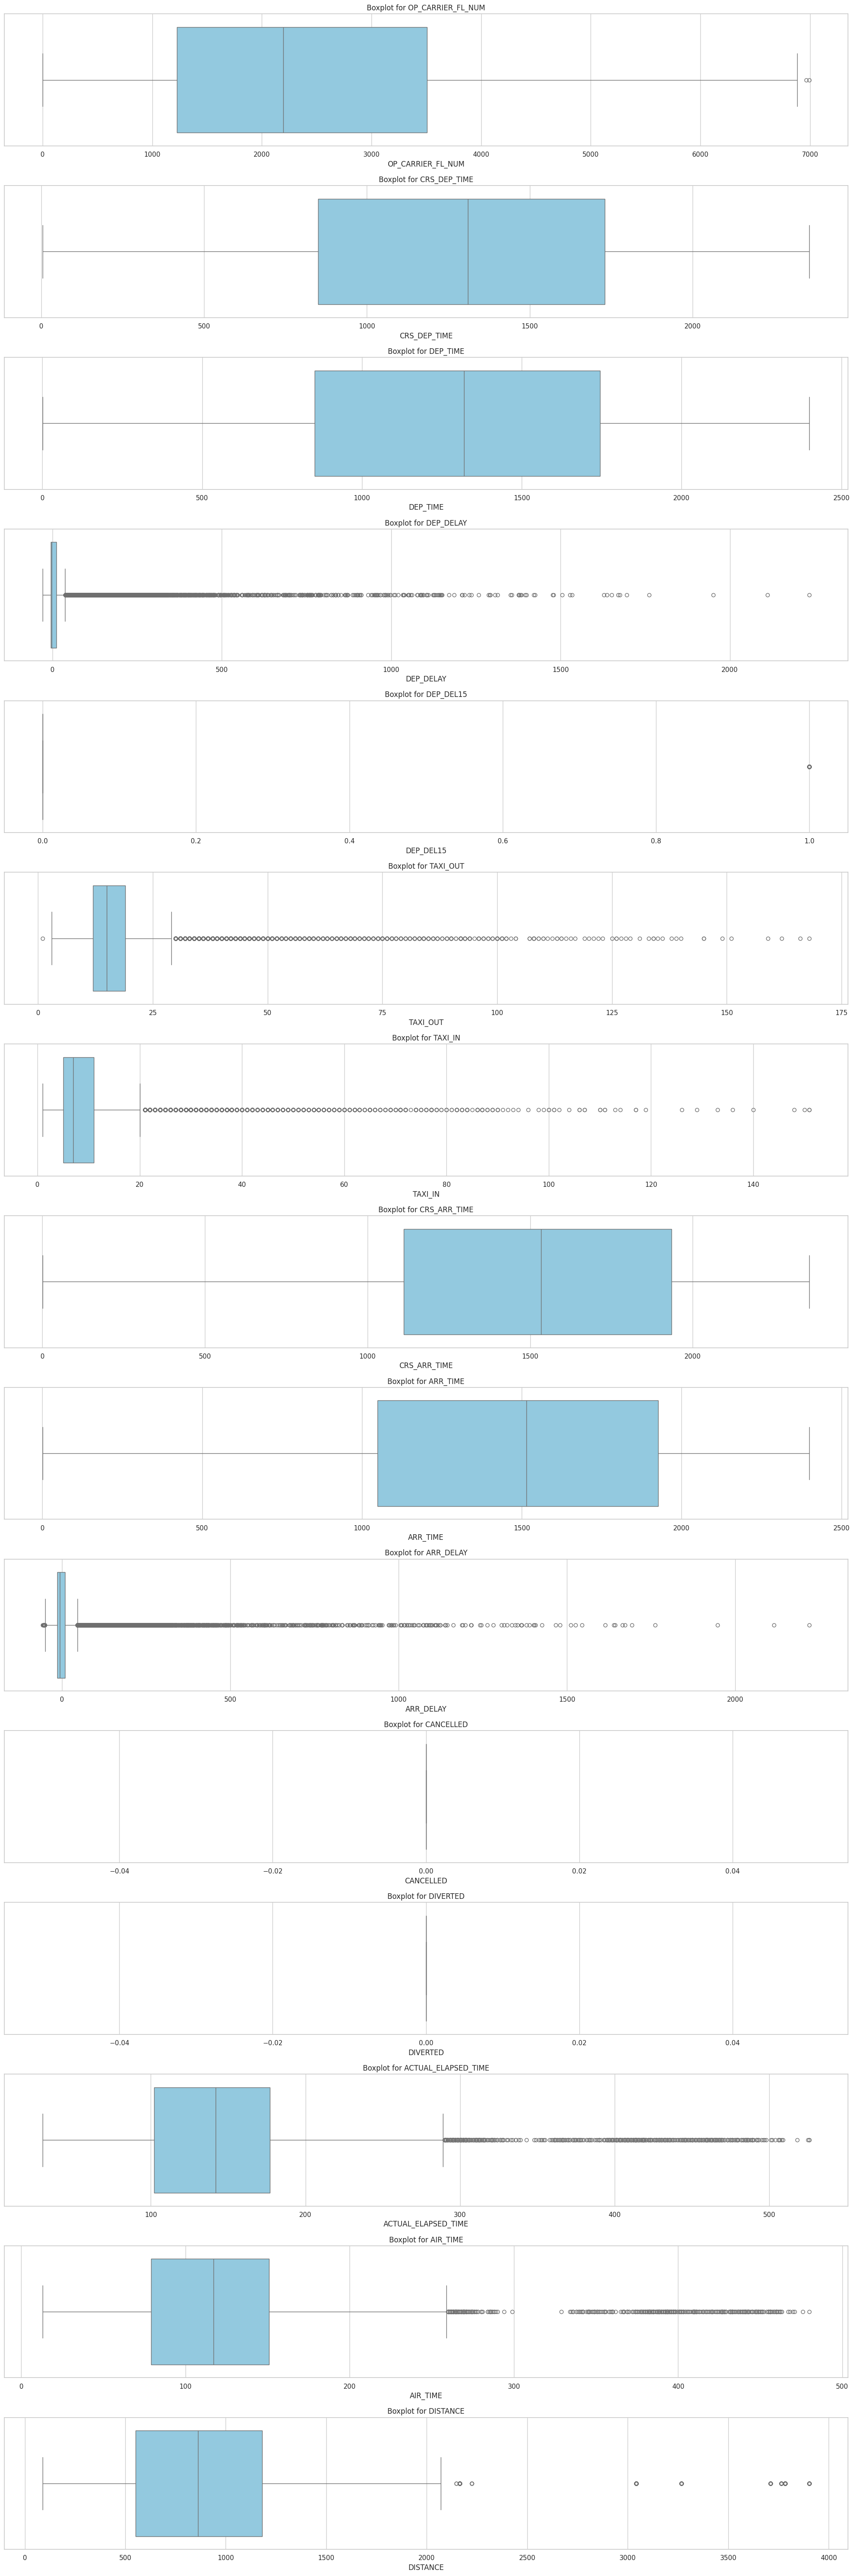

In [66]:
# Plot boxplots for numeric columns
numeric_columns = airline_reporting_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, len(numeric_columns) * 4))  # Adjust figure size based on the number of columns
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=airline_reporting_data_cleaned, x=col, color='skyblue')
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

# Handlng Outliers

In [67]:
# Defining a function to handle outliers using IQR

def handle_outliers(df, columns):
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:
            # Calculating Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1  # Interquartile Range

            # Defining bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap outliers to the bounds
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Selecting numeric columns

numeric_columns = airline_reporting_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

In [68]:
# Removing outliers

airline_reporting_data_cleaned = handle_outliers(airline_reporting_data_cleaned, numeric_columns)

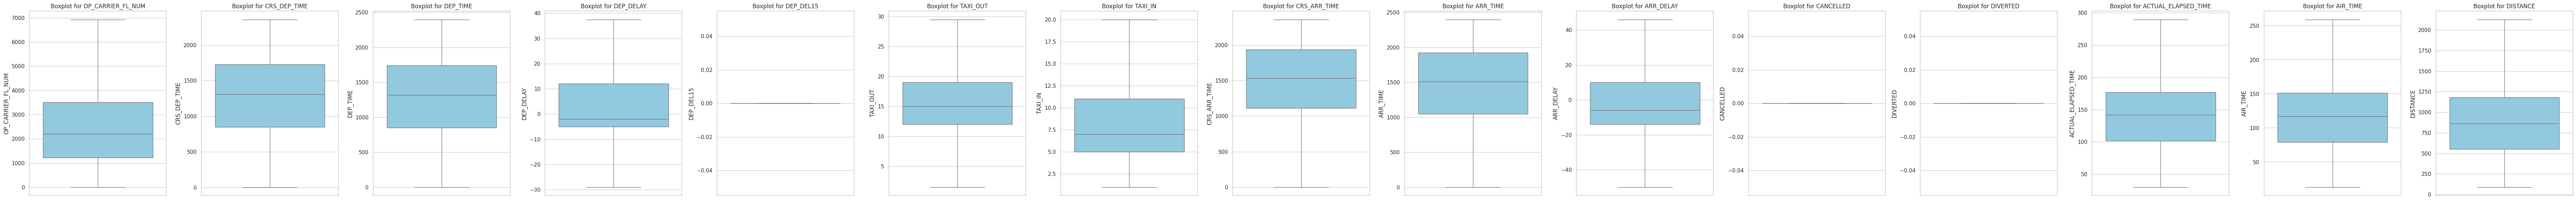

In [69]:
#  Checking outliers again to see if outliers are removed

plt.figure(figsize=(len(numeric_columns) * 5, 6))  # Width depends on the number of columns
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(data=airline_reporting_data_cleaned, y=col, color='skyblue')
    plt.title(f"Boxplot for {col}")
    plt.ylabel(col)
    plt.xticks([])  # Remove x-axis ticks for cleaner visualization
    plt.tight_layout()

plt.show()

# Feature Engineering

In [70]:
airline_reporting_data_cleaned.FL_DATE.value_counts()

,count
FL_DATE,
08-01-2024 00:00,4094
08-02-2024 00:00,4055
08-12-2024 00:00,3915
8/15/2024 12:00:00 AM,3900
08-09-2024 00:00,3897
8/16/2024 12:00:00 AM,3895
08-08-2024 00:00,3893
08-11-2024 00:00,3869
8/23/2024 12:00:00 AM,3865


In [71]:
# Trimming the time portion and keep only the date part in 'MM-DD-YYYY' format
airline_reporting_data_cleaned['FL_DATE'] = airline_reporting_data_cleaned['FL_DATE'].str.split(' ').str[0]

In [72]:
airline_reporting_data_cleaned.FL_DATE.value_counts()

,count
FL_DATE,
08-01-2024,4094
08-02-2024,4055
08-12-2024,3915
8/15/2024,3900
08-09-2024,3897
8/16/2024,3895
08-08-2024,3893
08-11-2024,3869
8/23/2024,3865


In [73]:
# Replacing dashes with slashes in the FL_DATE column to fix the date issue

airline_reporting_data_cleaned['FL_DATE'] = airline_reporting_data_cleaned['FL_DATE'].str.replace('-', '/')

In [74]:
# Converting the 'FL_DATE' to datetime format first

airline_reporting_data_cleaned['FL_DATE'] = pd.to_datetime(airline_reporting_data_cleaned['FL_DATE'], errors='coerce')

# Converting the 'FL_DATE' to a consistent format (MM-DD-YYYY)

airline_reporting_data_cleaned['FL_DATE'] = airline_reporting_data_cleaned['FL_DATE'].dt.strftime('%m-%d-%Y')

In [75]:
# Checking unique dates

print(airline_reporting_data_cleaned['FL_DATE'].value_counts())

FL_DATE
08-01-2024    4094
08-02-2024    4055
08-12-2024    3915
08-15-2024    3900
08-09-2024    3897
08-16-2024    3895
08-08-2024    3893
08-11-2024    3869
08-23-2024    3865
08-22-2024    3854
08-30-2024    3843
08-25-2024    3841
08-19-2024    3822
08-29-2024    3818
08-05-2024    3810
08-18-2024    3802
08-26-2024    3794
08-04-2024    3738
08-07-2024    3654
08-14-2024    3643
08-13-2024    3618
08-03-2024    3604
08-21-2024    3601
08-06-2024    3583
08-20-2024    3547
08-28-2024    3383
08-17-2024    3284
08-10-2024    3283
08-24-2024    3235
08-27-2024    3234
08-31-2024    2923
Name: count, dtype: int64


In [76]:
airline_reporting_data_cleaned['FL_DATE'] = pd.to_datetime(
    airline_reporting_data_cleaned['FL_DATE'], errors='coerce'
)

In [77]:
airline_reporting_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114297 entries, 0 to 115781
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FL_DATE              114297 non-null  datetime64[ns]
 1   OP_UNIQUE_CARRIER    114297 non-null  object        
 2   TAIL_NUM             114297 non-null  object        
 3   OP_CARRIER_FL_NUM    114297 non-null  float64       
 4   ORIGIN               114297 non-null  object        
 5   ORIGIN_CITY_NAME     114297 non-null  object        
 6   ORIGIN_STATE_ABR     114297 non-null  object        
 7   DEST                 114297 non-null  object        
 8   DEST_CITY_NAME       114297 non-null  object        
 9   DEST_STATE_ABR       114297 non-null  object        
 10  CRS_DEP_TIME         114297 non-null  float64       
 11  DEP_TIME             114297 non-null  float64       
 12  DEP_DELAY            114297 non-null  float64       
 13  DEP_DEL15          

In [78]:
airline_reporting_data_cleaned.isna().sum()

,0
FL_DATE,0
OP_UNIQUE_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN,0
ORIGIN_CITY_NAME,0
ORIGIN_STATE_ABR,0
DEST,0
DEST_CITY_NAME,0
DEST_STATE_ABR,0


In [79]:
# Extracting day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
airline_reporting_data_cleaned['DAY_OF_WEEK'] = airline_reporting_data_cleaned['FL_DATE'].dt.dayofweek

# Extracting week number of the year
airline_reporting_data_cleaned['WEEK_NUMBER'] = airline_reporting_data_cleaned['FL_DATE'].dt.isocalendar().week

# Extracting year
airline_reporting_data_cleaned['YEAR'] = airline_reporting_data_cleaned['FL_DATE'].dt.year

# Checking if the day is a weekend (1 for Saturday/Sunday, 0 for weekdays)
airline_reporting_data_cleaned['IS_WEEKEND'] = airline_reporting_data_cleaned['DAY_OF_WEEK'].apply(lambda x: 1 if x >= 5 else 0)

In [80]:
airline_reporting_data_cleaned.head()

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,...,ARR_DEL15,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY_OF_WEEK,WEEK_NUMBER,YEAR,IS_WEEKEND
0,2024-08-01,AA,N102UW,1384.0,DFW,"Dallas/Fort Worth, TX",TX,TUL,"Tulsa, OK",OK,...,1,0.0,0.0,59.0,43.0,237.0,3,31,2024,0
1,2024-08-01,AA,N102UW,674.0,MDT,"Harrisburg, PA",PA,DFW,"Dallas/Fort Worth, TX",TX,...,1,0.0,0.0,185.0,158.0,1231.0,3,31,2024,0
2,2024-08-01,AA,N103US,1371.0,DFW,"Dallas/Fort Worth, TX",TX,DSM,"Des Moines, IA",IA,...,1,0.0,0.0,105.0,85.0,624.0,3,31,2024,0
3,2024-08-01,AA,N103US,1967.0,SAT,"San Antonio, TX",TX,DFW,"Dallas/Fort Worth, TX",TX,...,1,0.0,0.0,76.0,48.0,247.0,3,31,2024,0
4,2024-08-01,AA,N103US,625.0,PHX,"Phoenix, AZ",AZ,SAT,"San Antonio, TX",TX,...,1,0.0,0.0,136.0,111.0,843.0,3,31,2024,0


# **Data Visualization**

<ipython-input-81-f069268554ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


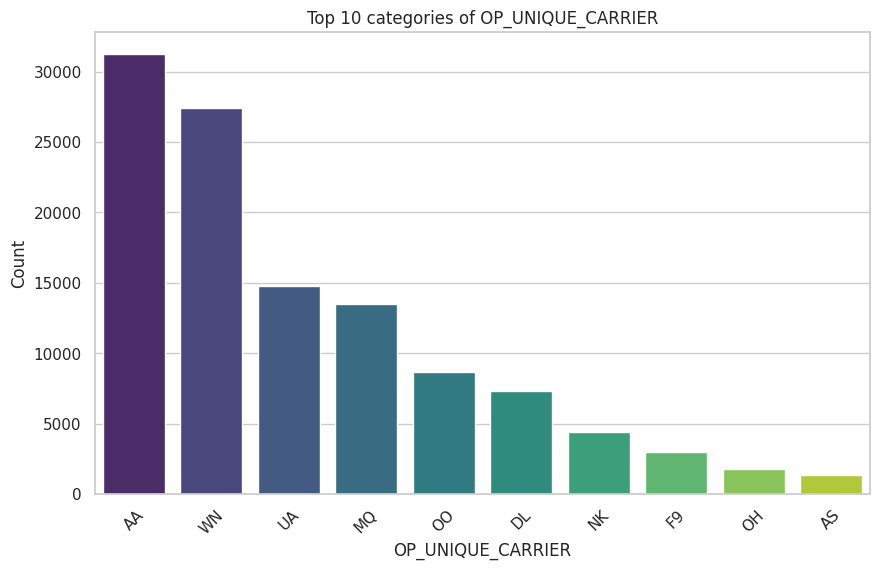

<ipython-input-81-f069268554ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


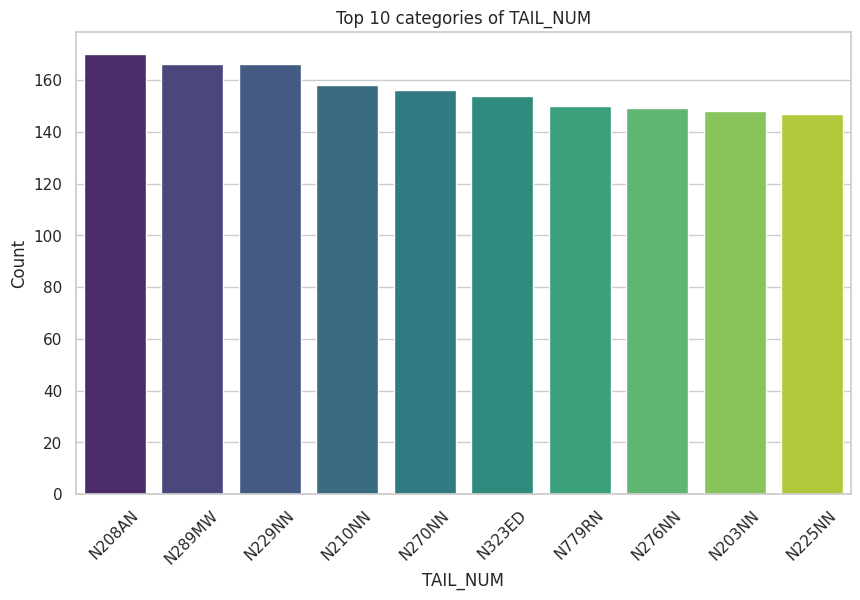

<ipython-input-81-f069268554ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


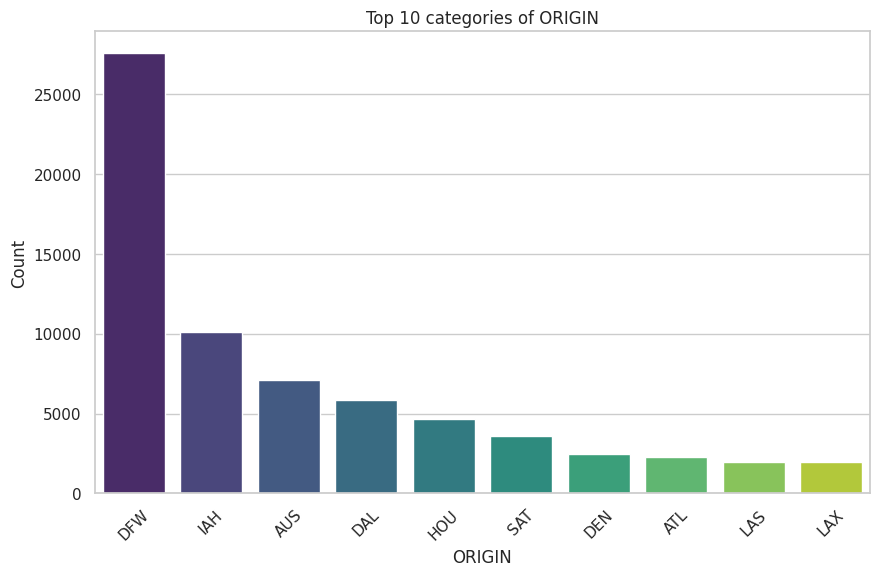

<ipython-input-81-f069268554ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


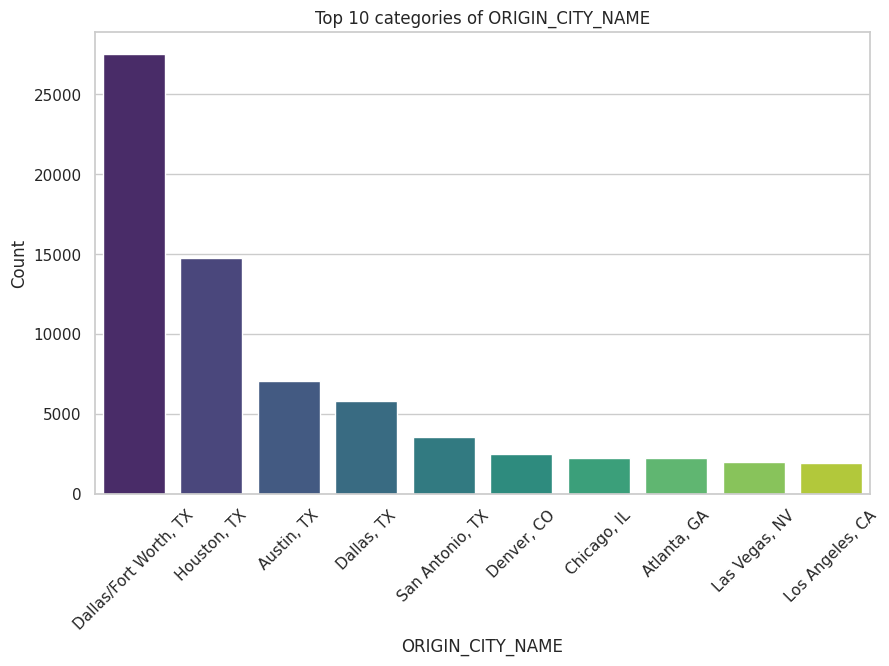

<ipython-input-81-f069268554ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


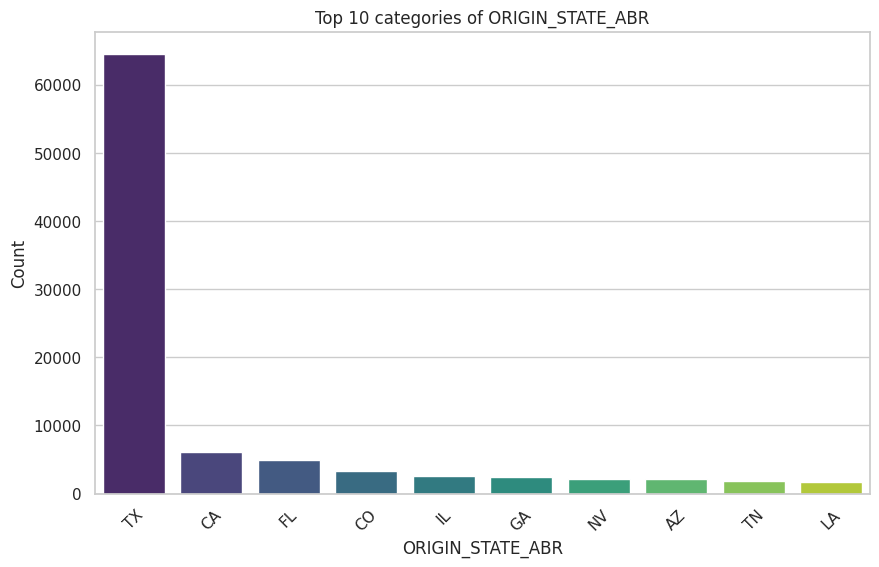

<ipython-input-81-f069268554ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


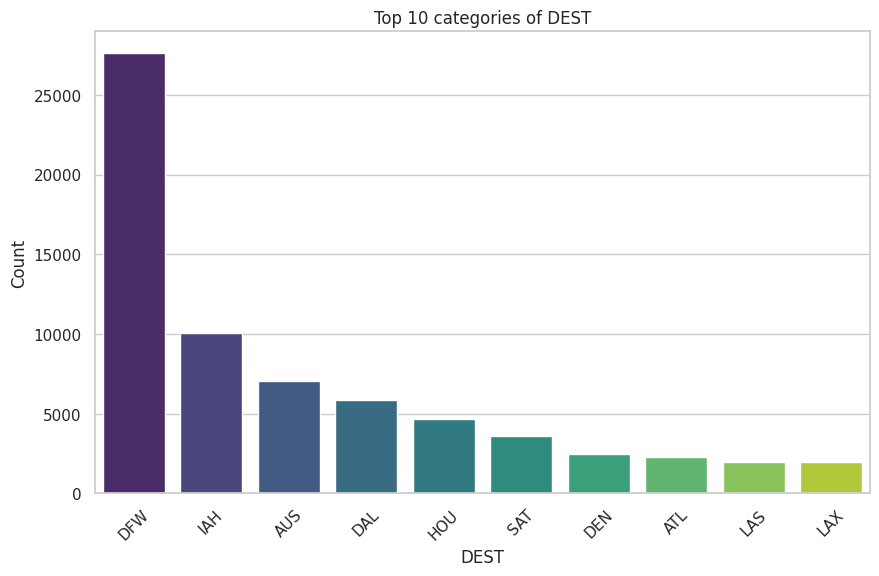

<ipython-input-81-f069268554ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


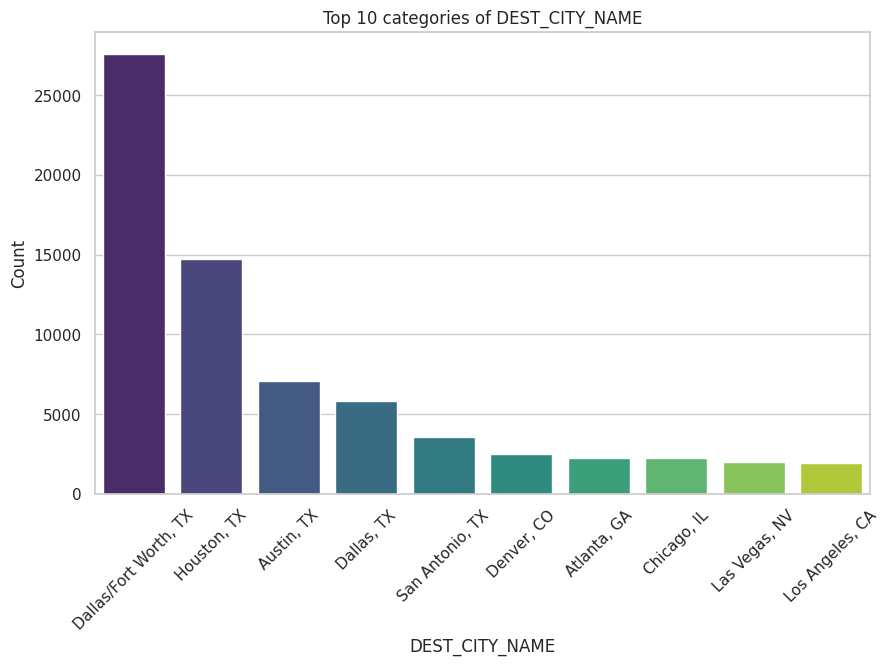

<ipython-input-81-f069268554ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


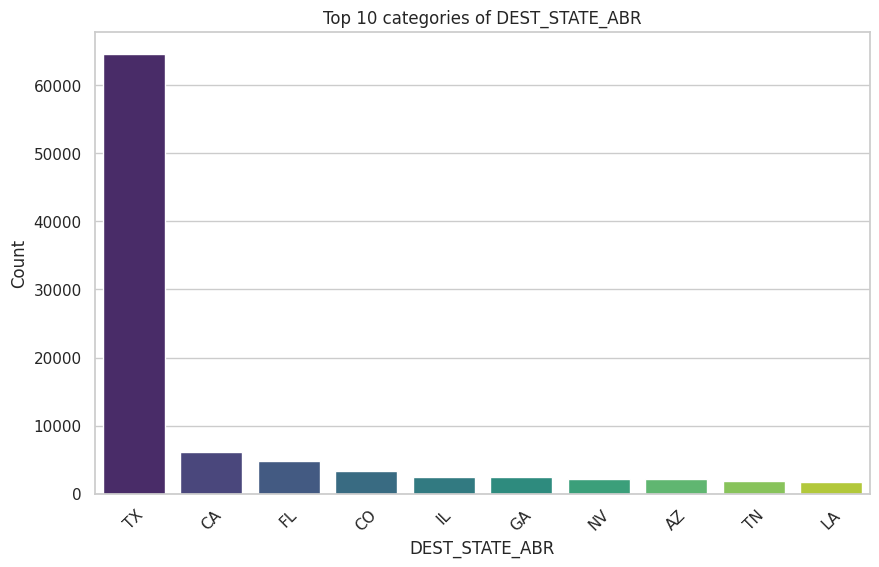

In [81]:
# Retrieving categorical columns from the dataset

categorical_columns = airline_reporting_data_cleaned.select_dtypes(include=['object']).columns

# Displaying EDA for categorical variables with more than 10 unique values

for col in categorical_columns:
    if airline_reporting_data_cleaned[col].nunique() > 10:
        plt.figure(figsize=(10, 6))
        top_categories = airline_reporting_data_cleaned[col].value_counts().head(10)
        sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
        plt.title(f'Top 10 categories of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

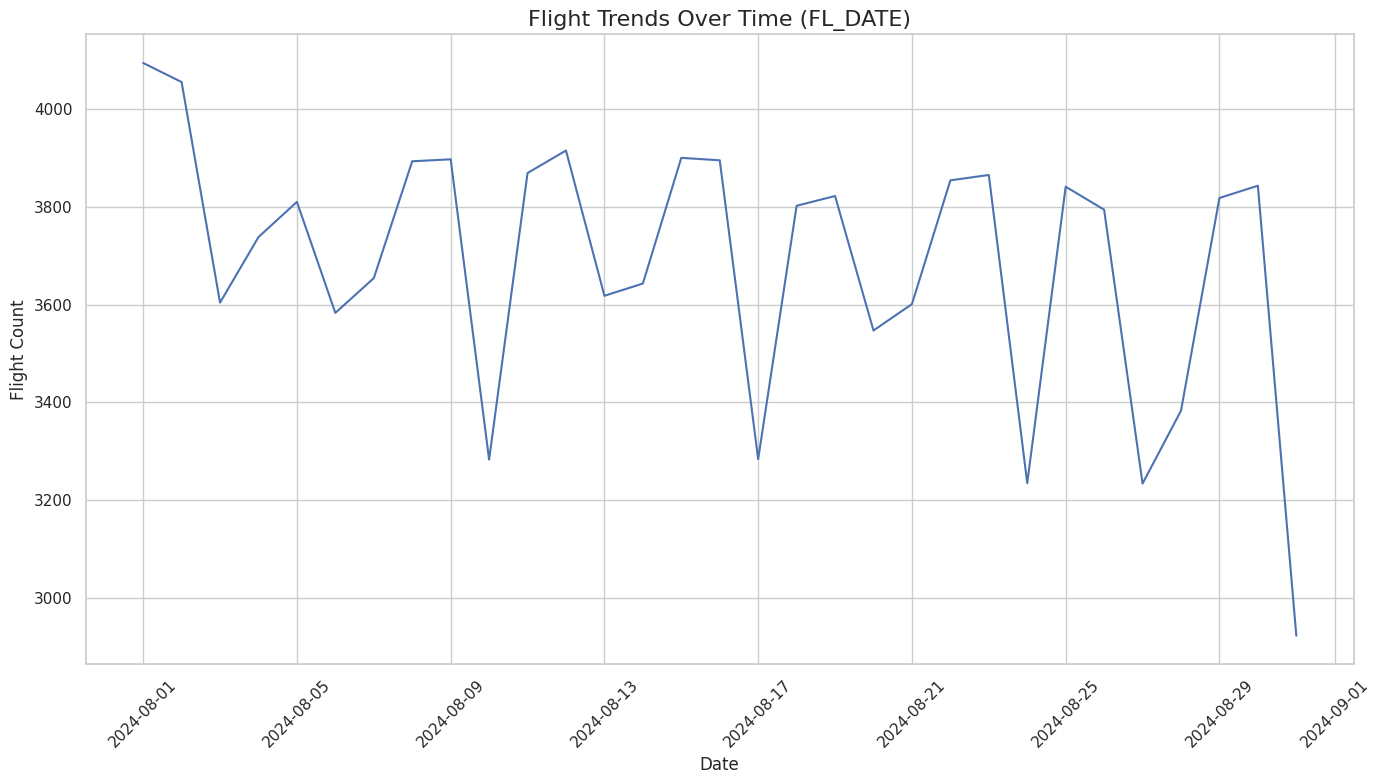

In [82]:
# Converting FL_DATE to datetime

airline_reporting_data_cleaned['FL_DATE'] = pd.to_datetime(airline_reporting_data_cleaned['FL_DATE'], errors='coerce')

# Grouping by date and count the number of occurrences per date
date_counts = airline_reporting_data_cleaned.groupby('FL_DATE').size()

# Plotting the trend of flights over time
plt.figure(figsize=(14, 8))
sns.lineplot(x=date_counts.index, y=date_counts.values, color='b')
plt.title('Flight Trends Over Time (FL_DATE)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Numeric Columns: Index(['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'IS_WEEKEND'],
      dtype='object')


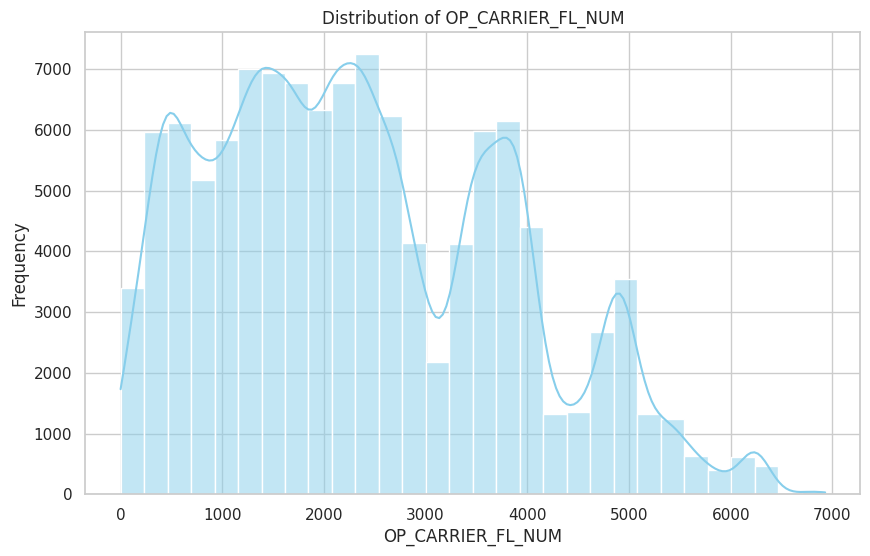

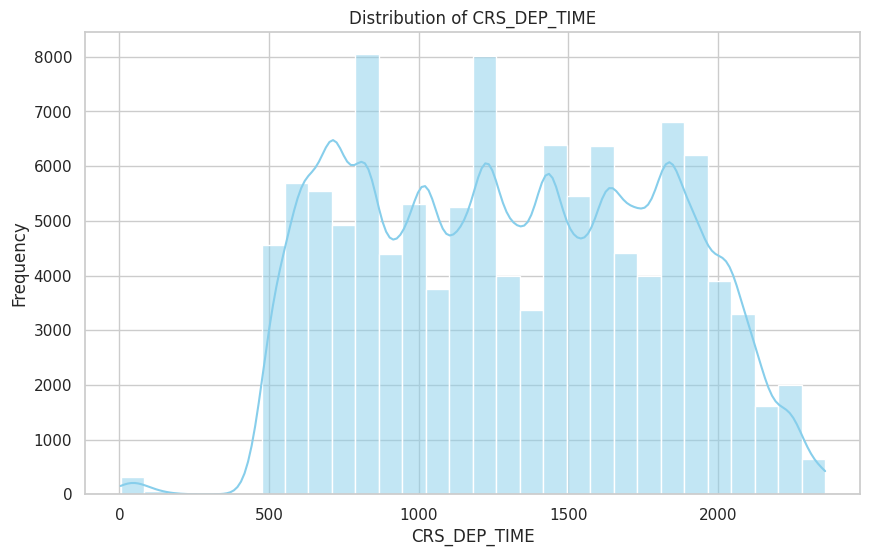

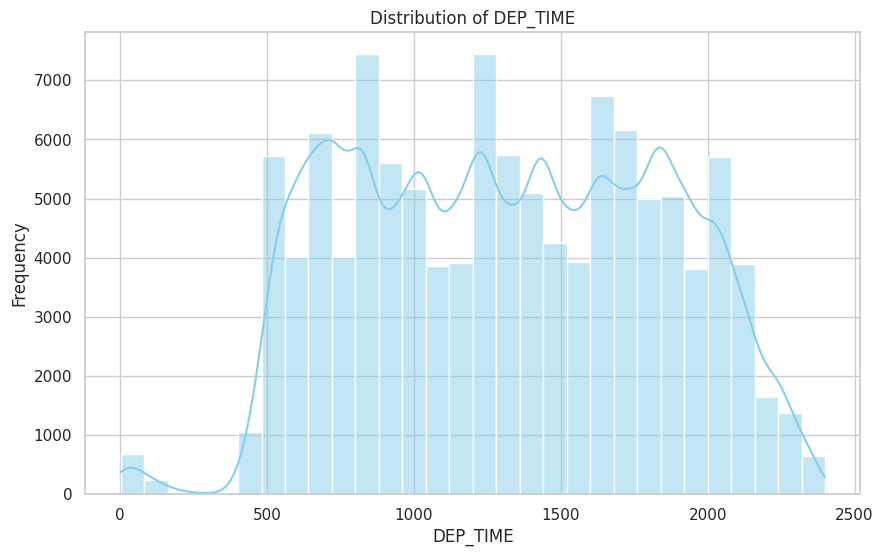

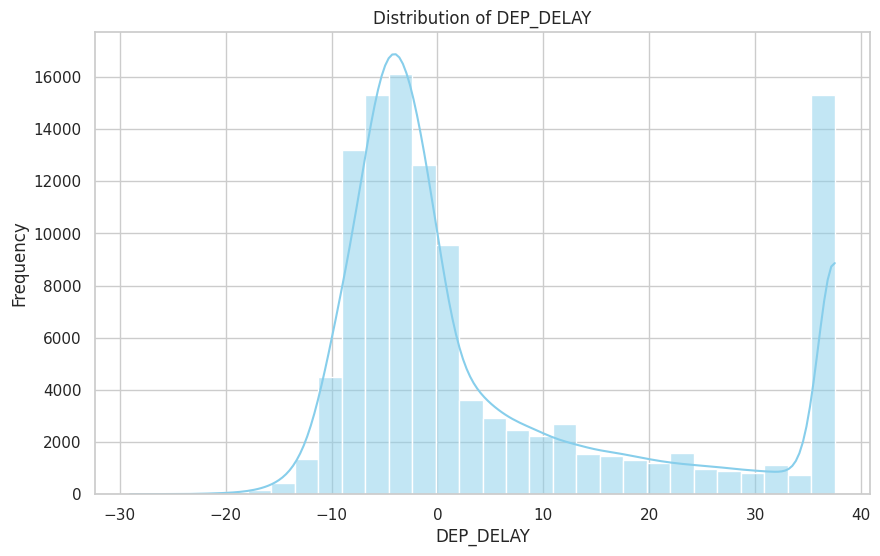

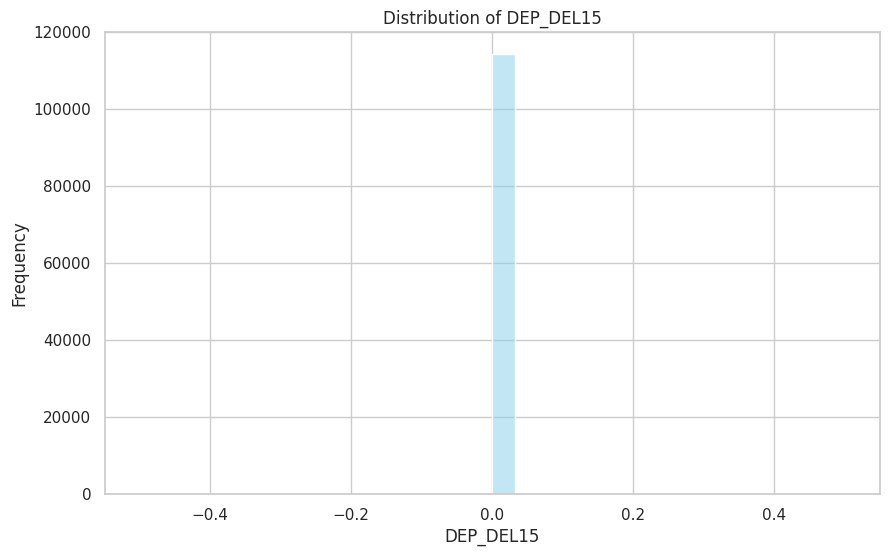

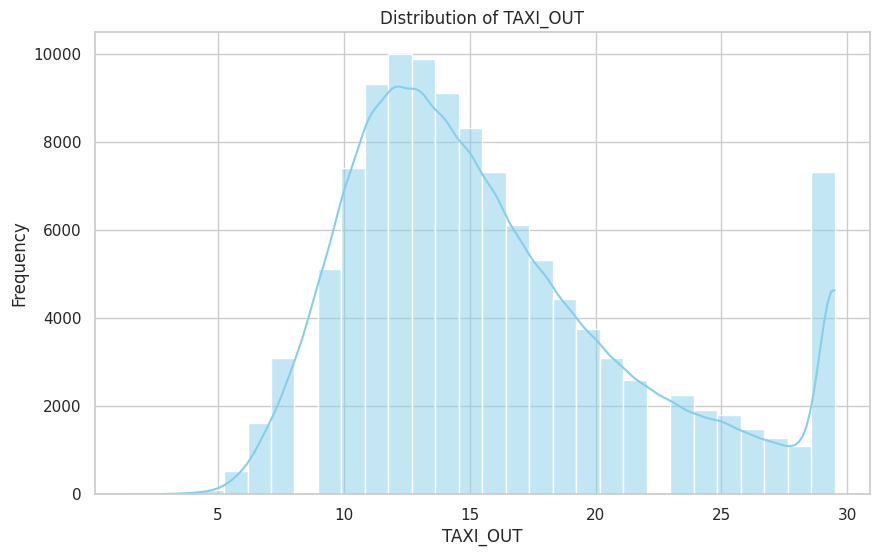

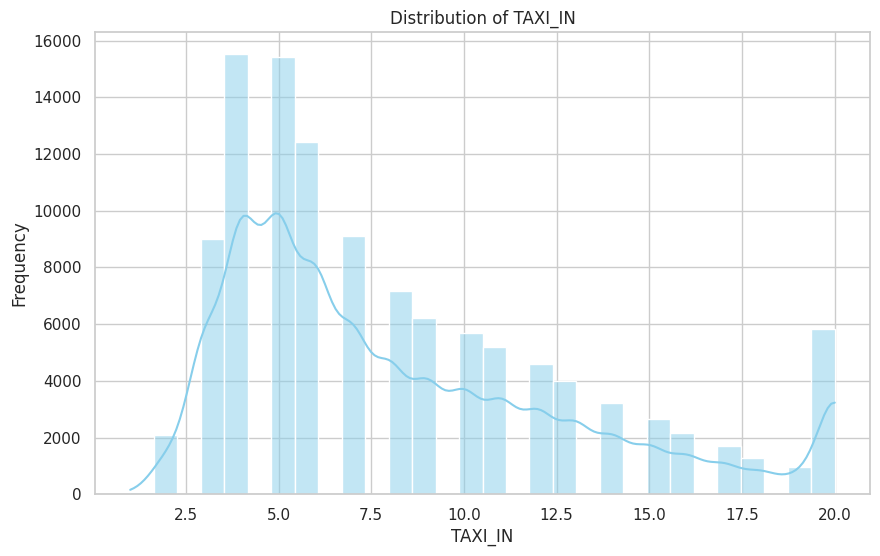

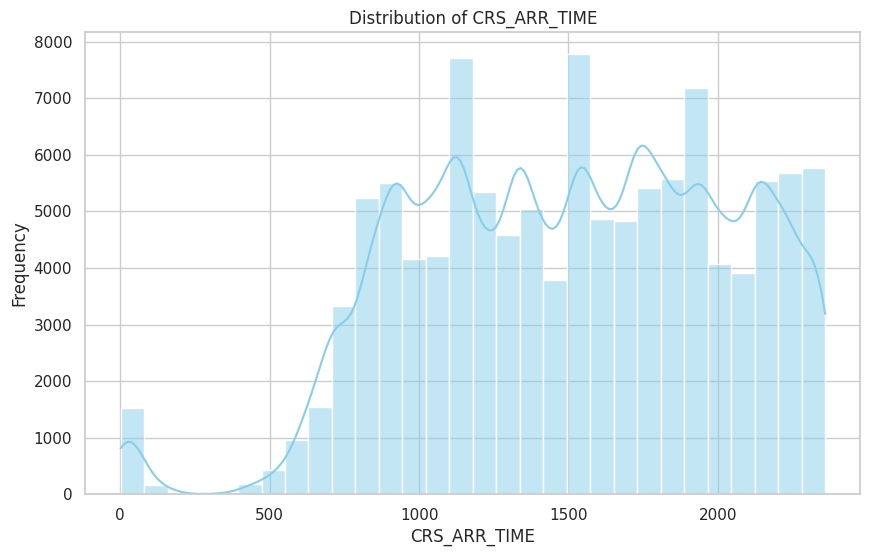

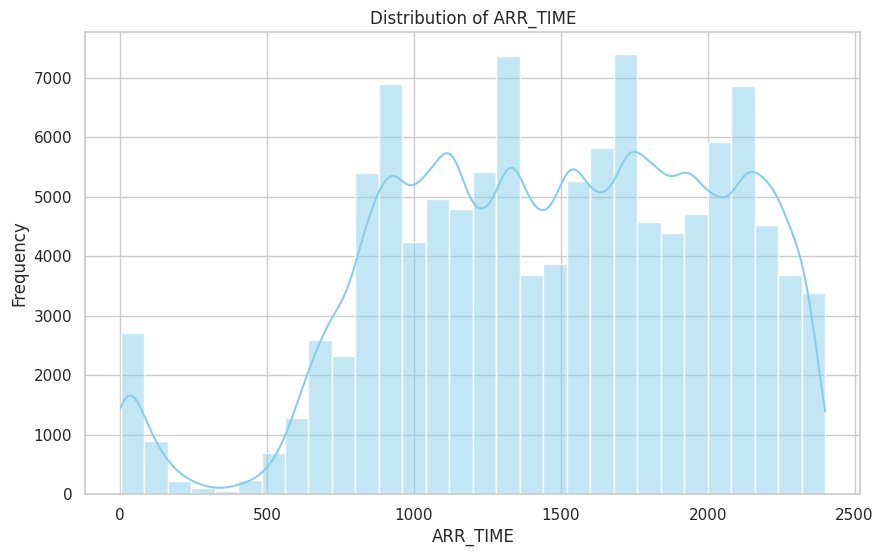

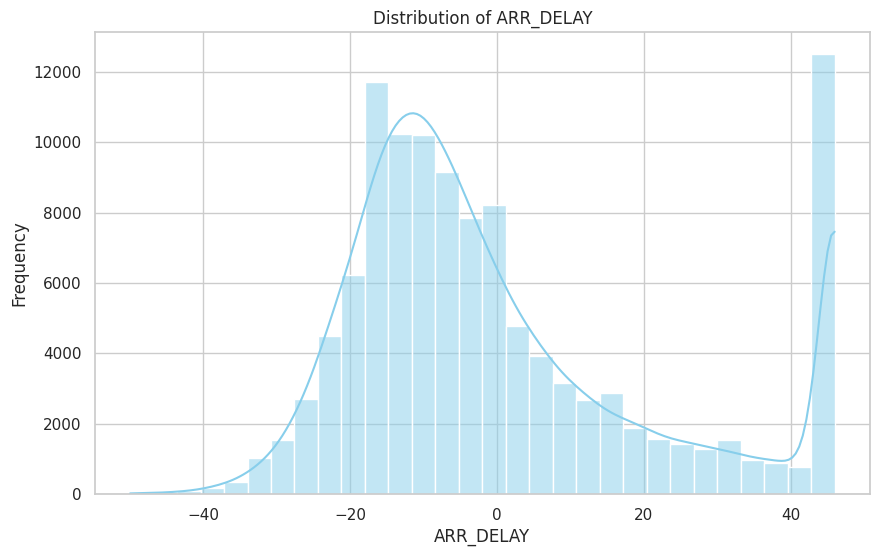

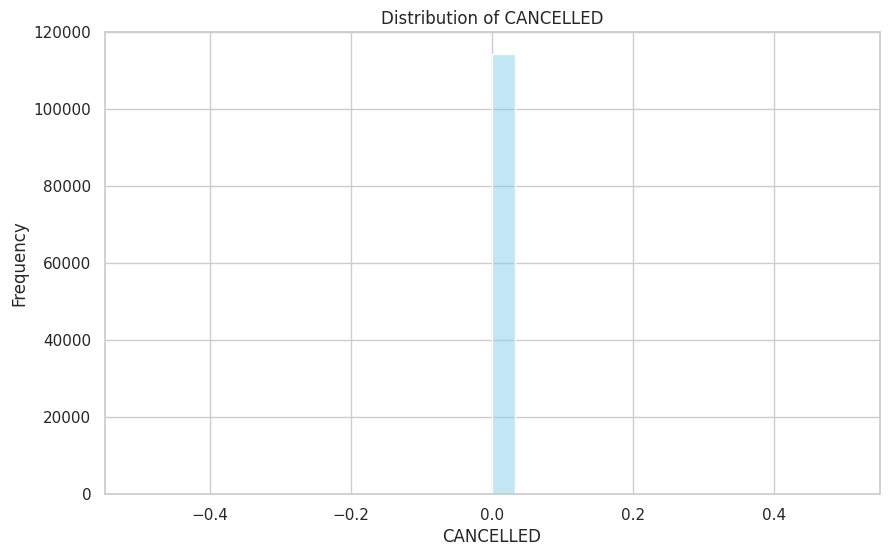

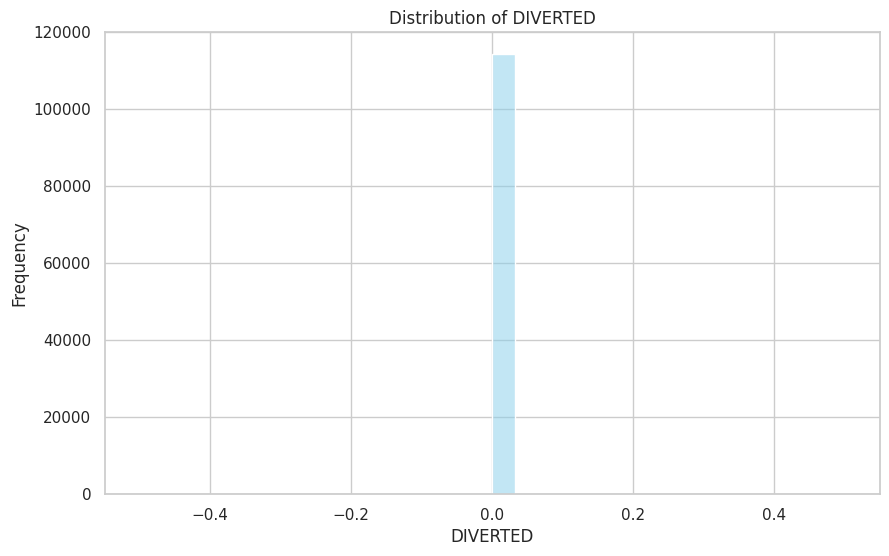

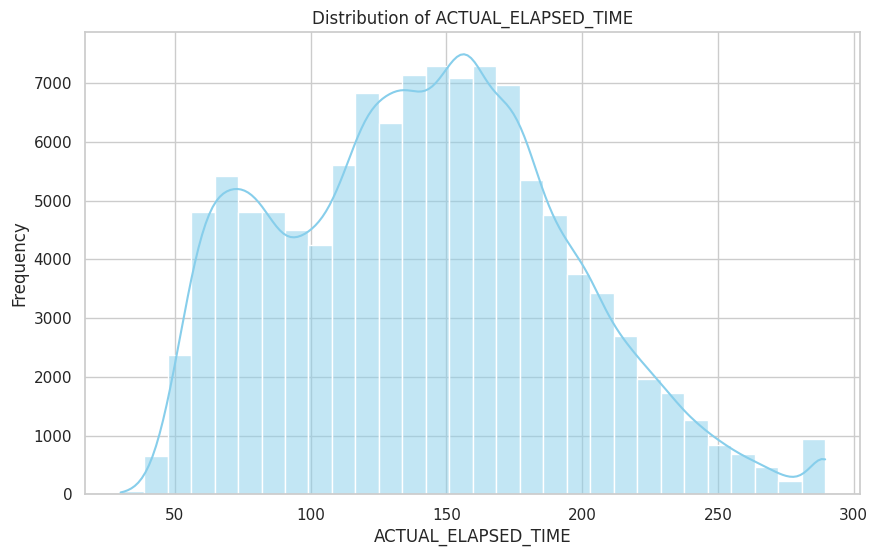

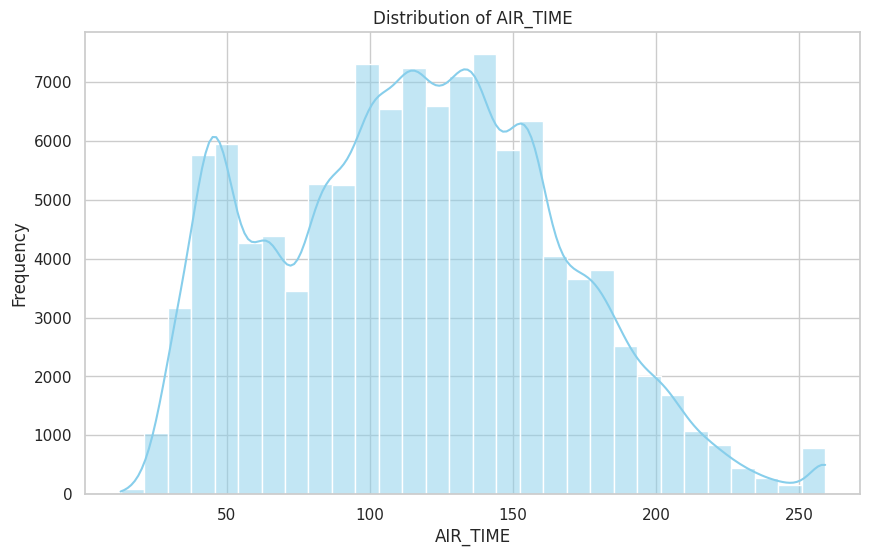

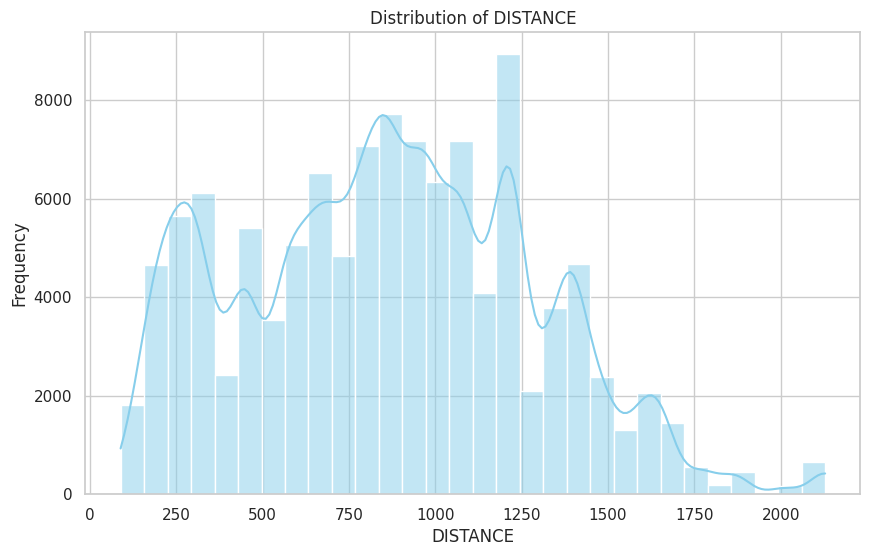

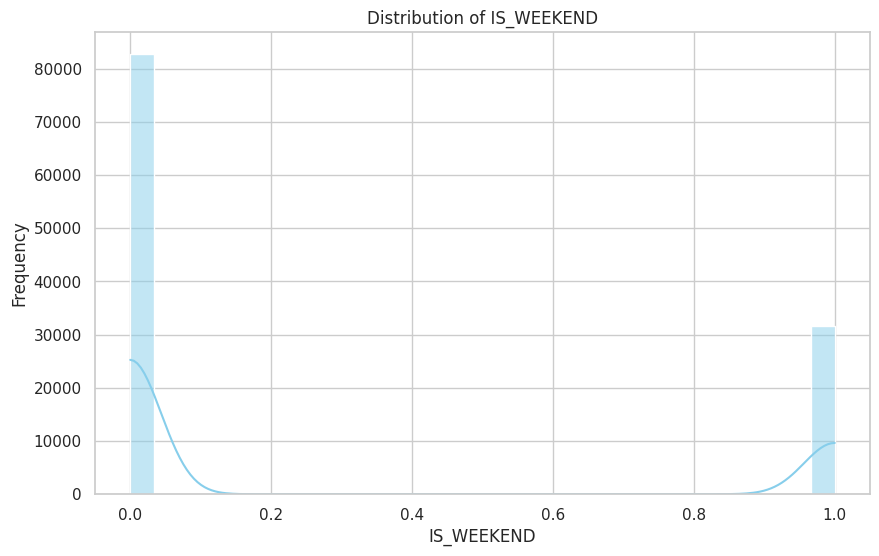

In [83]:
# Setting display options

sns.set(style="whitegrid")

# Identifying numeric columns in the dataset
numeric_columns = airline_reporting_data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Show the list of numeric columns
print(f"Numeric Columns: {numeric_columns}")

# Plotting Histograms for Numeric Variables
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(airline_reporting_data_cleaned[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

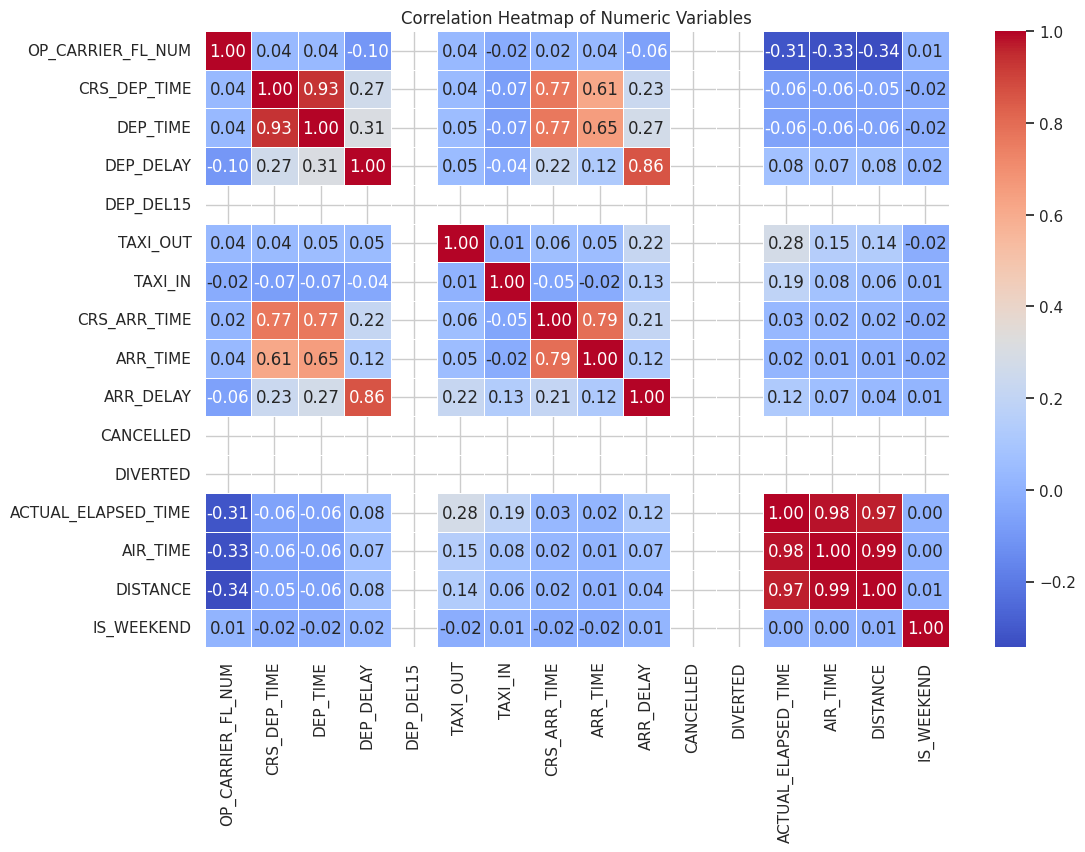

In [84]:
# Correlation Heatmap to check correlation

correlation_matrix = airline_reporting_data_cleaned[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


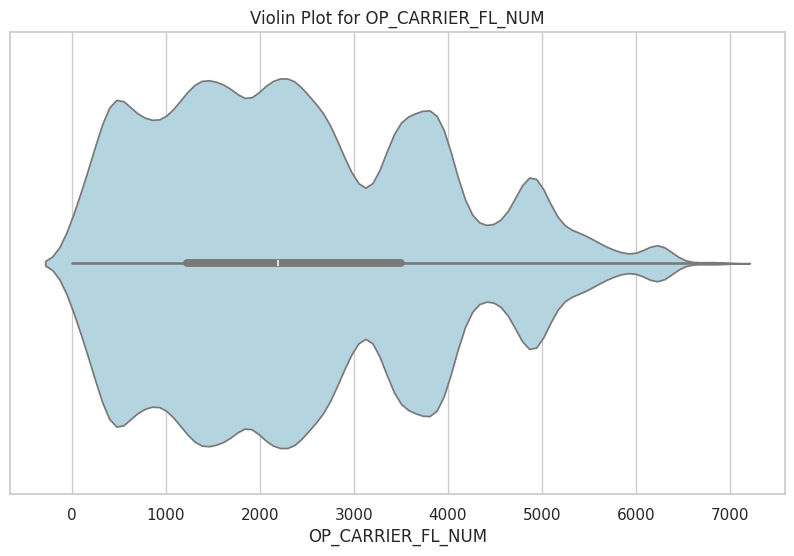

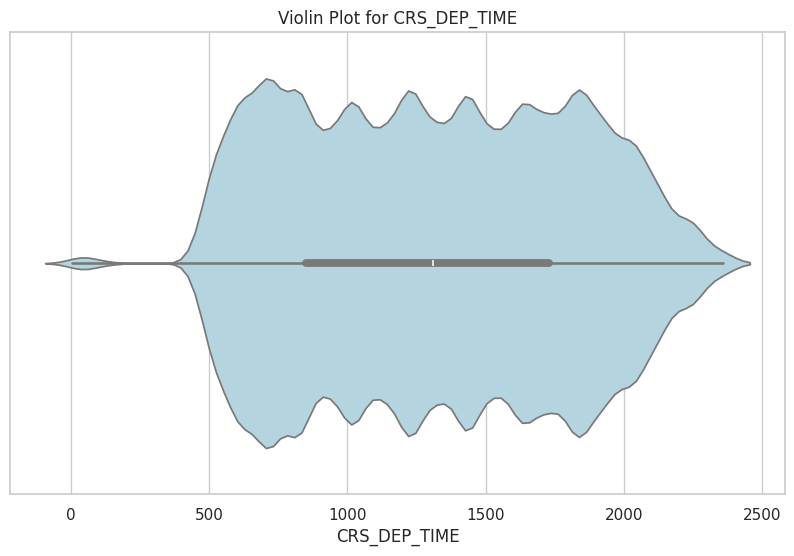

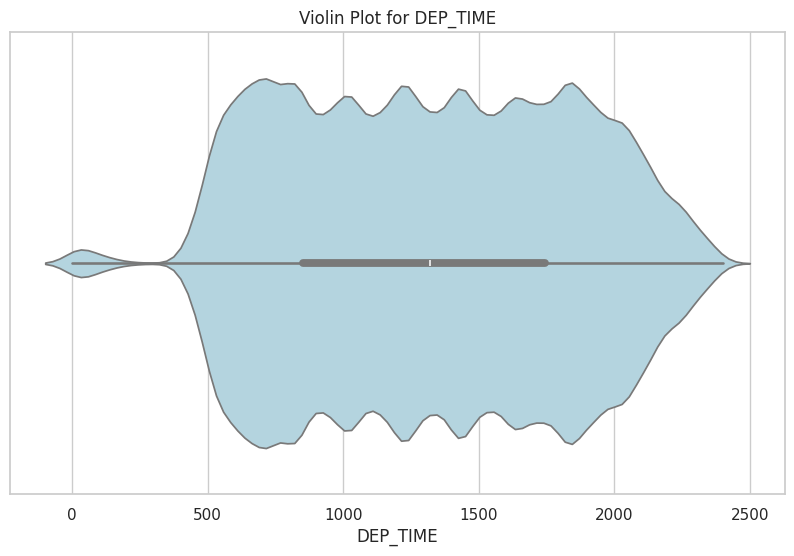

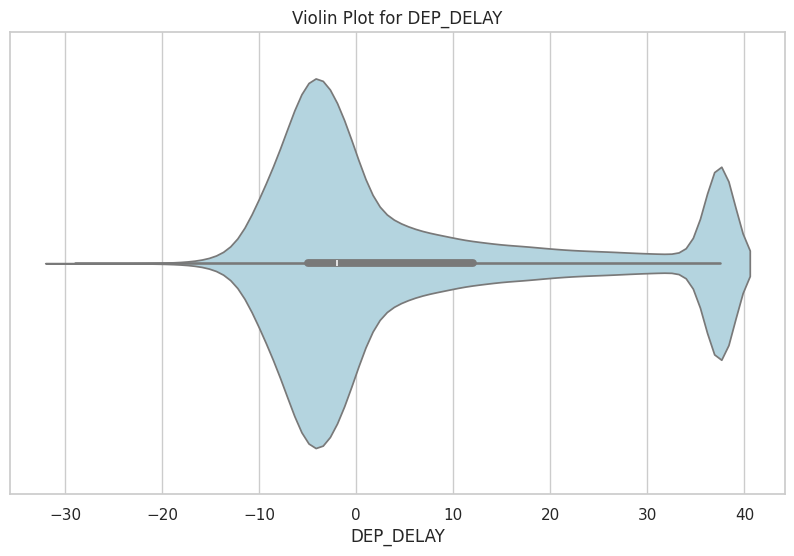

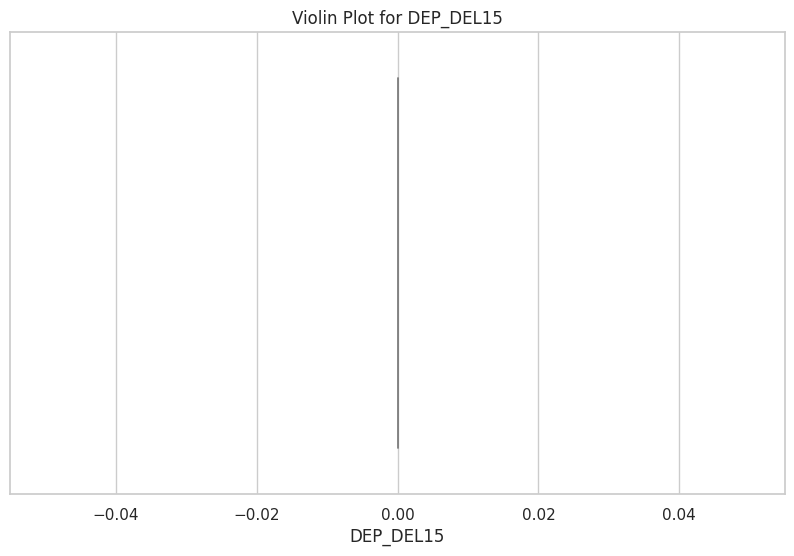

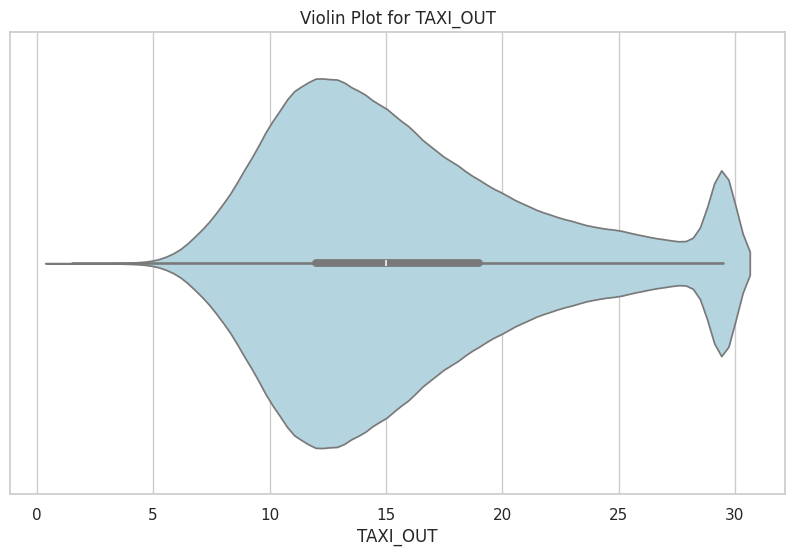

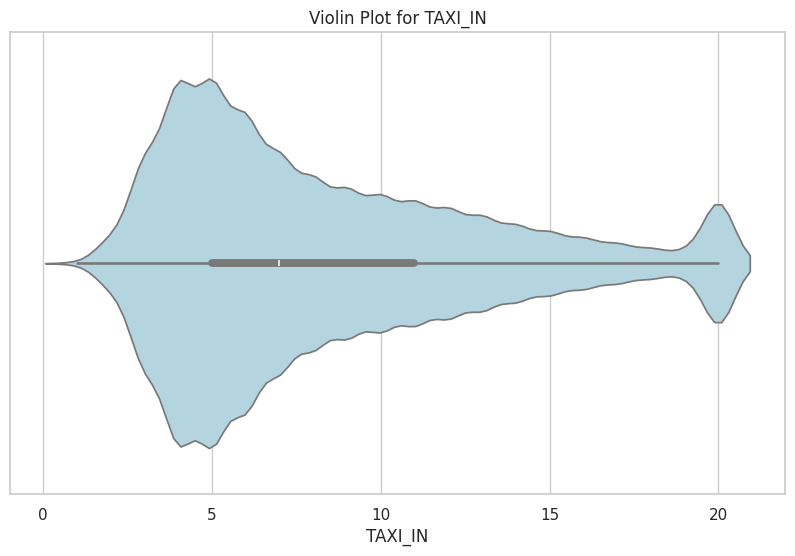

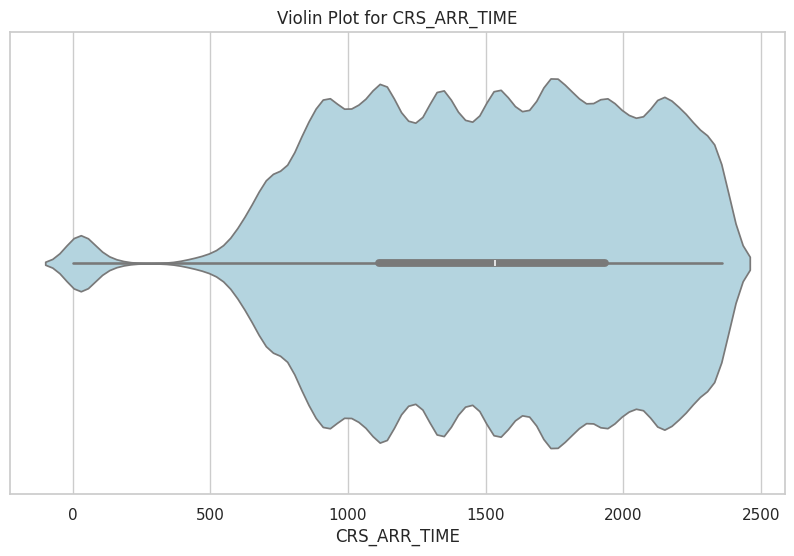

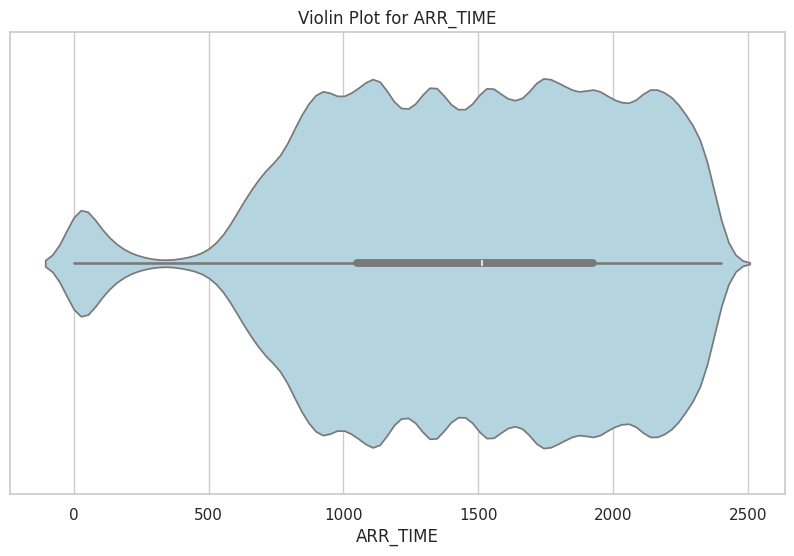

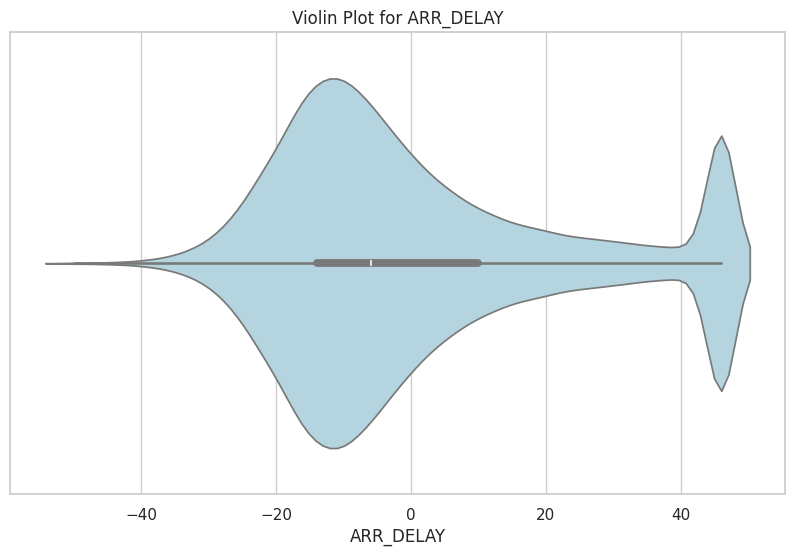

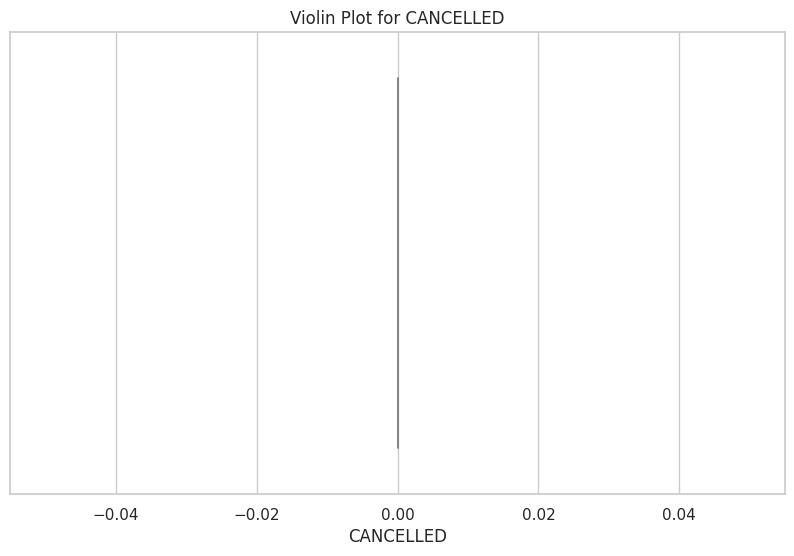

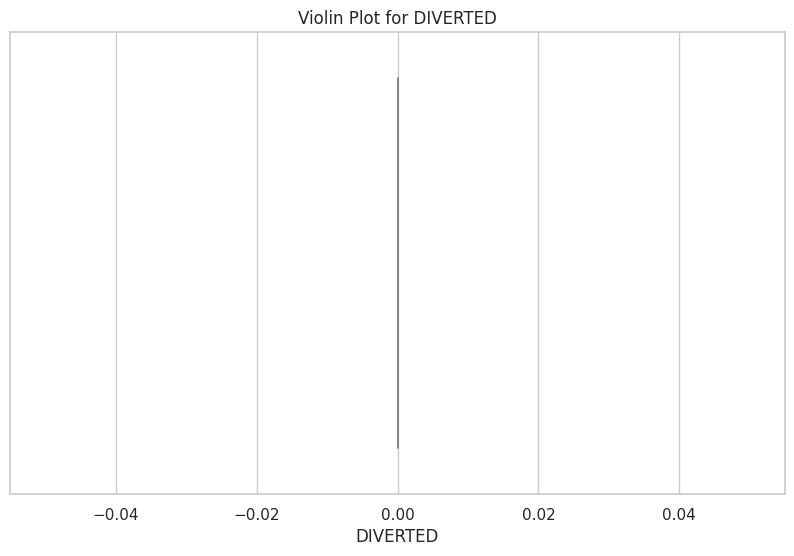

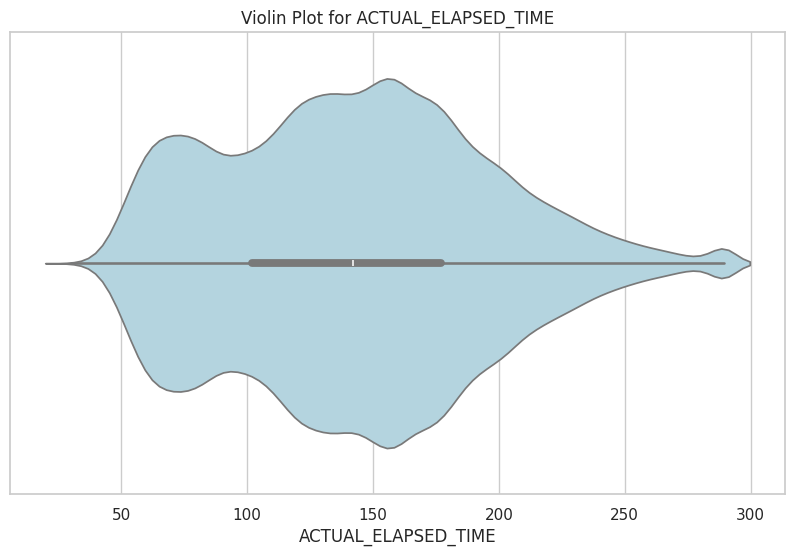

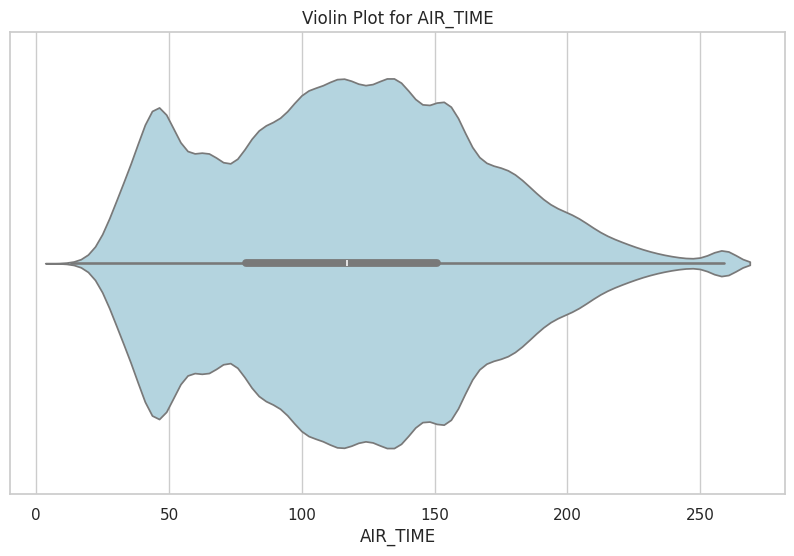

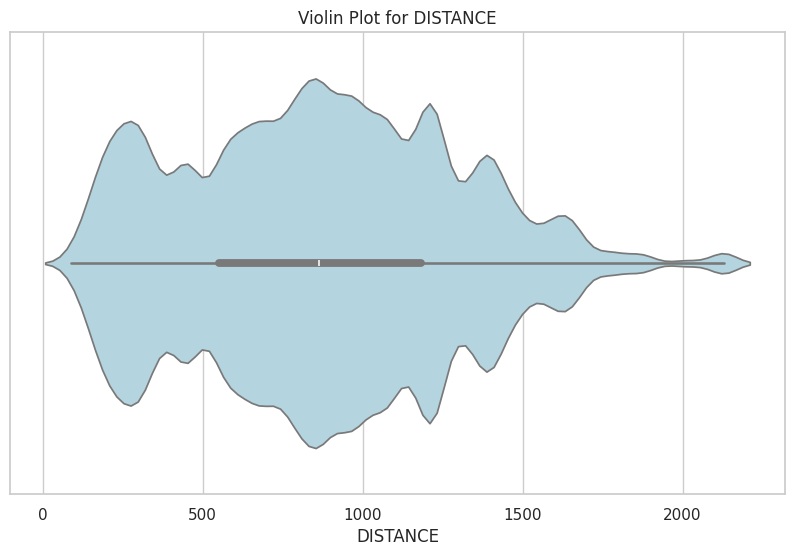

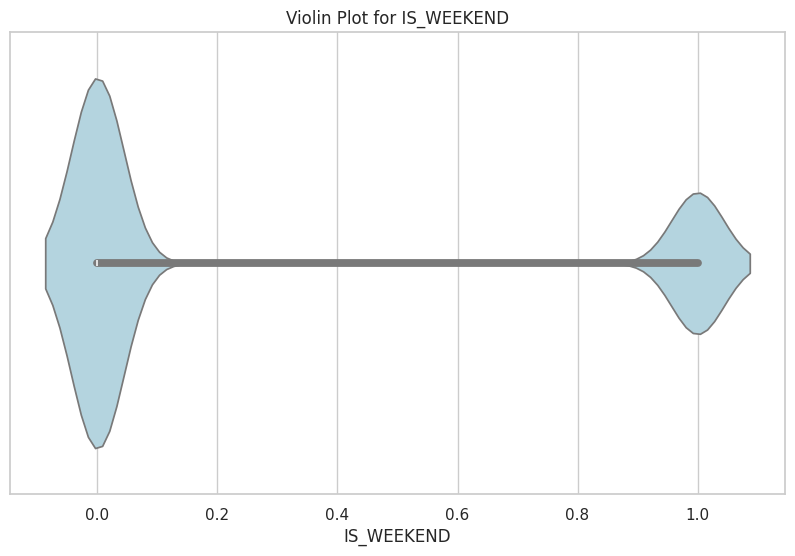

In [85]:
# Violin Plots for a more detailed view of distribution
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=airline_reporting_data_cleaned[col], color='lightblue')
    plt.title(f'Violin Plot for {col}')
    plt.show()

In [86]:
airline_reporting_data_cleaned['ARR_DEL15'].value_counts()

,count
ARR_DEL15,
0,89356
1,24941


In [87]:
# Creating List of columns to drop

columns_to_drop = ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
                   'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR','FL_DATE']

# Dropping the columns from the DataFrame

airline_reporting_data_cleaned = airline_reporting_data_cleaned.drop(columns=columns_to_drop)


# Verifying the DataFrame

print(airline_reporting_data_cleaned.head())

   OP_CARRIER_FL_NUM  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  DEP_DEL15  TAXI_OUT  \
0             1384.0        1945.0    2204.0       37.5        0.0      10.0   
1              674.0         655.0     804.0       37.5        0.0      10.0   
2             1371.0        2122.0    2332.0       37.5        0.0      17.0   
3             1967.0        1420.0    1543.0       37.5        0.0      18.0   
4              625.0         910.0    1033.0       37.5        0.0      21.0   

   TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY ARR_DEL15  CANCELLED  DIVERTED  \
0      6.0        2051.0    2303.0       46.0         1        0.0       0.0   
1     17.0         915.0    1009.0       46.0         1        0.0       0.0   
2      3.0        2317.0     117.0       46.0         1        0.0       0.0   
3     10.0        1535.0    1659.0       46.0         1        0.0       0.0   
4      4.0        1328.0    1449.0       46.0         1        0.0       0.0   

   ACTUAL_ELAPSED_TIME  AIR_TIME  DIST

In [88]:
airline_reporting_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114297 entries, 0 to 115781
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OP_CARRIER_FL_NUM    114297 non-null  float64
 1   CRS_DEP_TIME         114297 non-null  float64
 2   DEP_TIME             114297 non-null  float64
 3   DEP_DELAY            114297 non-null  float64
 4   DEP_DEL15            114297 non-null  float64
 5   TAXI_OUT             114297 non-null  float64
 6   TAXI_IN              114297 non-null  float64
 7   CRS_ARR_TIME         114297 non-null  float64
 8   ARR_TIME             114297 non-null  float64
 9   ARR_DELAY            114297 non-null  float64
 10  ARR_DEL15            114297 non-null  object 
 11  CANCELLED            114297 non-null  float64
 12  DIVERTED             114297 non-null  float64
 13  ACTUAL_ELAPSED_TIME  114297 non-null  float64
 14  AIR_TIME             114297 non-null  float64
 15  DISTANCE             1

In [89]:
airline_reporting_data_cleaned.isna().sum()

,0
OP_CARRIER_FL_NUM,0
CRS_DEP_TIME,0
DEP_TIME,0
DEP_DELAY,0
DEP_DEL15,0
TAXI_OUT,0
TAXI_IN,0
CRS_ARR_TIME,0
ARR_TIME,0
ARR_DELAY,0


In [90]:
airline_reporting_data_cleaned['ARR_DEL15'].astype('int')

,ARR_DEL15
0,1
1,1
2,1
3,1
4,1
...,...
115777,0
115778,0
115779,0
115780,0


In [91]:
# Creating Data for the Model

X = airline_reporting_data_cleaned.drop(columns=['ARR_DEL15'])

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Applying the scaler to X (the features dataset)
X_scaled = scaler.fit_transform(X)

# Converting the scaled array back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Checking the first few rows of the scaled data
print(X_scaled_df.head())

   OP_CARRIER_FL_NUM  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  DEP_DEL15  TAXI_OUT  \
0          -0.684064      1.282805  1.724379   2.052887        0.0 -1.018938   
1          -1.170040     -1.329300 -0.998171   2.052887        0.0 -1.018938   
2          -0.692962      1.641210  1.973298   2.052887        0.0  0.179208   
3          -0.285016      0.219739  0.438947   2.052887        0.0  0.350371   
4          -1.203579     -0.812954 -0.552839   2.052887        0.0  0.863863   

    TAXI_IN  CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CANCELLED  DIVERTED  \
0 -0.484250      1.058983  1.516202   2.105706        0.0       0.0   
1  1.824292     -1.144828 -0.830773   2.105706        0.0       0.0   
2 -1.113853      1.575016 -2.448626   2.105706        0.0       0.0   
3  0.355220      0.057956  0.348156   2.105706        0.0       0.0   
4 -0.903985     -0.343619 -0.032729   2.105706        0.0       0.0   

   ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  DAY_OF_WEEK  WEEK_NUMBER  YEAR  \
0            -

In [92]:
X_scaled_df.head()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY_OF_WEEK,WEEK_NUMBER,YEAR,IS_WEEKEND
0,-0.684064,1.282805,1.724379,2.052887,0.0,-1.018938,-0.484250,1.058983,1.516202,2.105706,0.0,0.0,-1.587991,-1.484147,-1.500583,-0.043753,-1.596563,0.0,-0.617873
1,-1.170040,-1.329300,-0.998171,2.052887,0.0,-1.018938,1.824292,-1.144828,-0.830773,2.105706,0.0,0.0,0.827495,0.838118,0.872549,-0.043753,-1.596563,0.0,-0.617873
2,-0.692962,1.641210,1.973298,2.052887,0.0,0.179208,-1.113853,1.575016,-2.448626,2.105706,0.0,0.0,-0.706147,-0.636015,-0.576637,-0.043753,-1.596563,0.0,-0.617873
3,-0.285016,0.219739,0.438947,2.052887,0.0,0.350371,0.355220,0.057956,0.348156,2.105706,0.0,0.0,-1.262092,-1.383179,-1.476708,-0.043753,-1.596563,0.0,-0.617873
4,-1.203579,-0.812954,-0.552839,2.052887,0.0,0.863863,-0.903985,-0.343619,-0.032729,2.105706,0.0,0.0,-0.111861,-0.110982,-0.053784,-0.043753,-1.596563,0.0,-0.617873


In [93]:
y = airline_reporting_data_cleaned['ARR_DEL15']

In [94]:
y.value_counts()

,count
ARR_DEL15,
0,89356
1,24941


In [101]:
y = y.astype(int)

In [102]:
# Performing Train and Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

In [103]:
# Defining a function to fit the model with cross-validation
def fit_model_with_cv(model, X, y):
    """
    Fits a model to the data using StratifiedKFold cross-validation and returns the cross-validation scores.
    """
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    return cv_scores

In [104]:

# Defining a function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the model by providing classification report, confusion matrix, and AUC-ROC score.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # AUC-ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1
    auc_roc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    return report, cm, auc_roc, fpr, tpr

In [105]:
# Defining a Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name):
    """
    Plots the ROC curve for a given model.
    """
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve ({model_name})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [109]:
# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM (Support Vector Machine)': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Dictionary to store metrics for all models
metrics = {}

Evaluating Random Forest...


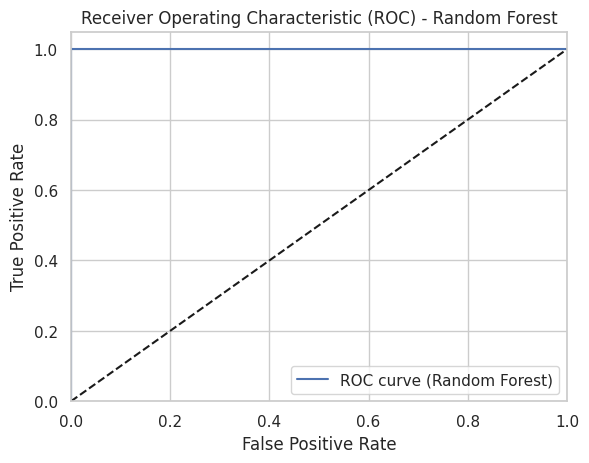

Evaluating Logistic Regression...


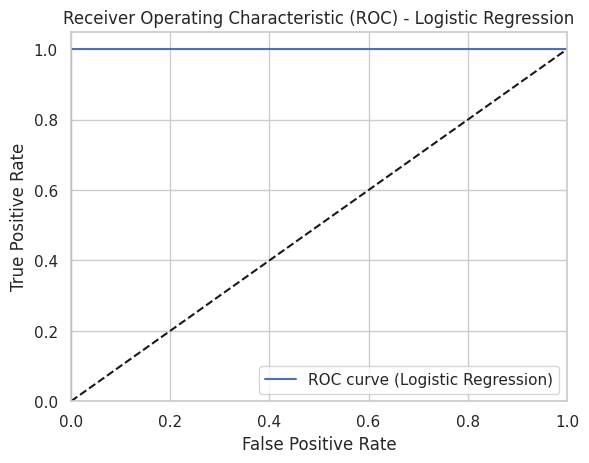

Evaluating SVM (Support Vector Machine)...


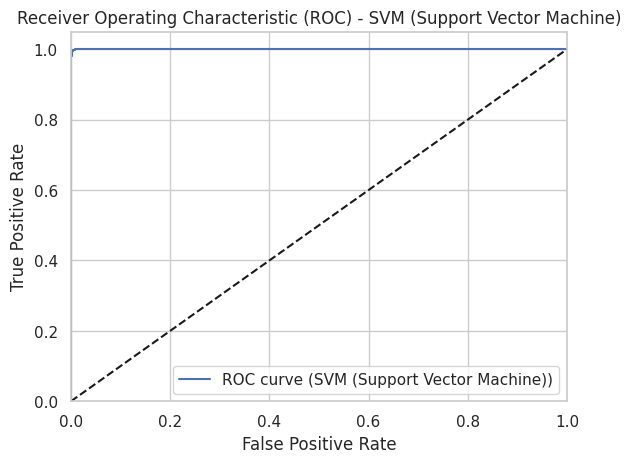

Evaluating Decision Tree...


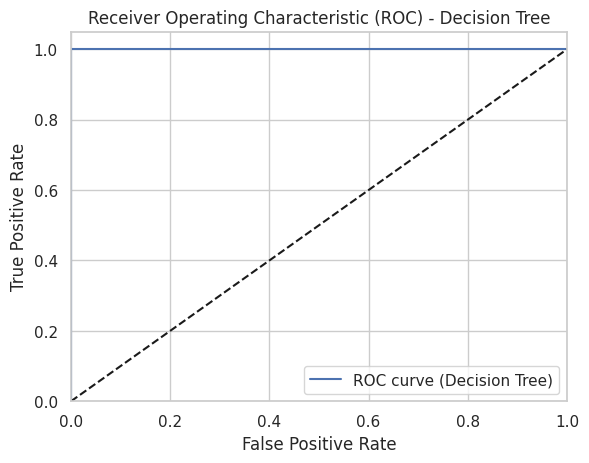

Evaluating K-Nearest Neighbors...


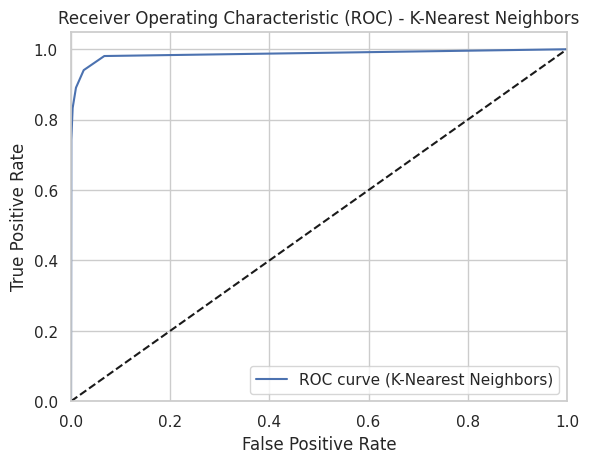

Evaluating Naive Bayes...


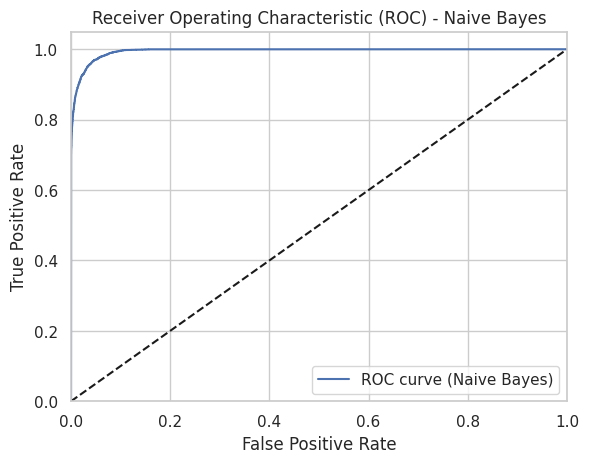

Evaluating SGD Classifier...


AttributeError: This 'SGDClassifier' has no attribute 'predict_proba'

In [108]:
# Evaluating all models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Cross-validation scores
    cv_scores = fit_model_with_cv(model, X_scaled_df, y)

    # Getting classification report, confusion matrix, and AUC-ROC curve
    report, cm, auc_roc, fpr, tpr = evaluate_model(model, X_train, X_test, y_train, y_test)

    # Storing results in metrics dictionary
    metrics[model_name] = {
        'CV Accuracy Mean': np.mean(cv_scores),
        'Precision Class 0': report['0']['precision'],
        'Recall Class 0': report['0']['recall'],
        'F1-Score Class 0': report['0']['f1-score'],
        'Precision Class 1': report['1']['precision'],
        'Recall Class 1': report['1']['recall'],
        'F1-Score Class 1': report['1']['f1-score'],
        'Accuracy': report['accuracy'],
        'Confusion Matrix': cm,
        'AUC-ROC': auc_roc
    }

    # Plotting the ROC curve for each model
    plot_roc_curve(fpr, tpr, model_name)

In [110]:
# Converting metrics dictionary into a DataFrame

metrics_df = pd.DataFrame(metrics).T

In [111]:
# Displaying the comparison of metrics

metrics_df

""
